## Image Classification using model built in Tensorflow 

#### Using MNIST data to test the functionality of the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('dataset/train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
trX = train.drop('label',axis=1).values
trX = trX.reshape([-1,28,28])
trY = train['label'].values

In [5]:
trX.shape

(42000, 28, 28)

In [6]:
trY = pd.get_dummies(trY).values
trY.shape

(42000, 10)

#### The input images are of size (28x28) but the model expects input image size to be multiple of 8 so padding zeros at the border to make image size (32x32)

In [7]:
n_samples = trX.shape[0]
resized_image = []
for i in xrange(n_samples):
    img = trX[i]
    img = np.lib.pad(img, (2,2), 'constant', constant_values=(0))
    resized_image.append(img)

In [8]:
trX = np.array(resized_image).reshape([-1,32,32,1])

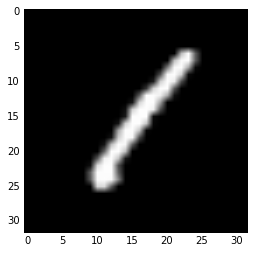

In [9]:
plt.imshow(trX[0].reshape(32,32),cmap='gray')

In [10]:
trX = trX/255.0

In [11]:
from sklearn.cross_validation import train_test_split
Xtrain,Xval,ytrain,yval = train_test_split(trX,trY,test_size=0.2)

In [12]:
from ImageClassifier import ConvolutionalClassifier
clf = ConvolutionalClassifier(n_classes=10,img_dims=trX[0].shape, ckpt_dir="./ckpt_dir", summary_dir="/tmp/convClf_logs")

In [13]:
clf.train(Xtrain,ytrain,n_iters=6000,batch_size=20,learning_rate=7e-4,keep_prob=0.5)

./ckpt_dir/model.ckpt-14000
Loss at step 14000: 0.000783717
Loss at step 14010: 0.000165834
Loss at step 14020: 0.00220895
Loss at step 14030: 0.0390278
Loss at step 14040: 5.87713e-06
Loss at step 14050: 0.0250071
Loss at step 14060: 0.000852887
Loss at step 14070: 0.0979741
Loss at step 14080: 2.23026e-05
Loss at step 14090: 0.0197195
Loss at step 14100: 0.182181
Loss at step 14110: 0.00494025
Loss at step 14120: 0.000394644
Loss at step 14130: 0.0067536
Loss at step 14140: 3.43001e-05
Loss at step 14150: 4.30353e-06
Loss at step 14160: 0.00189605
Loss at step 14170: 0.000122177
Loss at step 14180: 0.0010358
Loss at step 14190: 0.0979133
Loss at step 14200: 0.000769445
Loss at step 14210: 0.00131037
Loss at step 14220: 0.0196502
Loss at step 14230: 0.00787526
Loss at step 14240: 2.1578e-05
Loss at step 14250: 0.0634497
Loss at step 14260: 0.144282
Loss at step 14270: 0.0138611
Loss at step 14280: 0.00643823
Loss at step 14290: 0.000328499
Loss at step 14300: 0.0431006
Loss at step 14

In [ ]:
# Accuracy and loss for training data
clf.score(Xtrain,ytrain)

In [ ]:
# Accuracy and loss for validation data
clf.score(Xval,yval)

### Loss function and accuracy plots visualized using tensorboard with logdir=convClf_logs/